Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web. El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web.

Para ello, la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año.

**De esta primera parte del enunciado sé que lo que me piden es un modelo de aprendizaje supervisado de clasificación, separando a los clientes en grupos bajo la probabilidad de gastar o no al visitar la página web**

Comienzo importando los datos de la url que se facilita en el enunciado y visualizando rápidamente los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos el conjunto de datos, descargado del enlace
df=pd.read_csv('/Users/raquelgalloroncero/Downloads/online_shoppers_intention 2.csv')    

In [3]:
#Mostramos las primeras 5 filas
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
#Obtengo información general sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

De esta primera parte ya puedo extraer la siguiente información:
    
    No existen valores faltantes en ninguna de las columnas.
    
    Mi variable objetivo, que es la variable Revenue se trata de una var. booleana que puede tomar los valores True y False.
    
    Las variables Administrative, Informational y Productrelated son variables enteras según vienen definidas en el enunciado.
    
    Esas mismas variables asociadas a la duración, son variables flotantes.
    
    Las variables BounceRates, ExitRates y PageValues no pueden tomar valores negativos según vienen definidas en el enunciado.
    
    Ocurre lo mismo con la variable Specialday que toma valores mayores de 0 dependiendo de su cercanía a un día especial.

In [5]:
#Realizo una estadística descriptiva de las variables numéricas.
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Al observar los valores mínimos de todas las variables numéricas ninguno es menor de 0, por lo que no existe ningún dato anomalo en ese sentido.

1.-Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.

Comienzo representando las var. numéricas mediante histogramas y boxplots

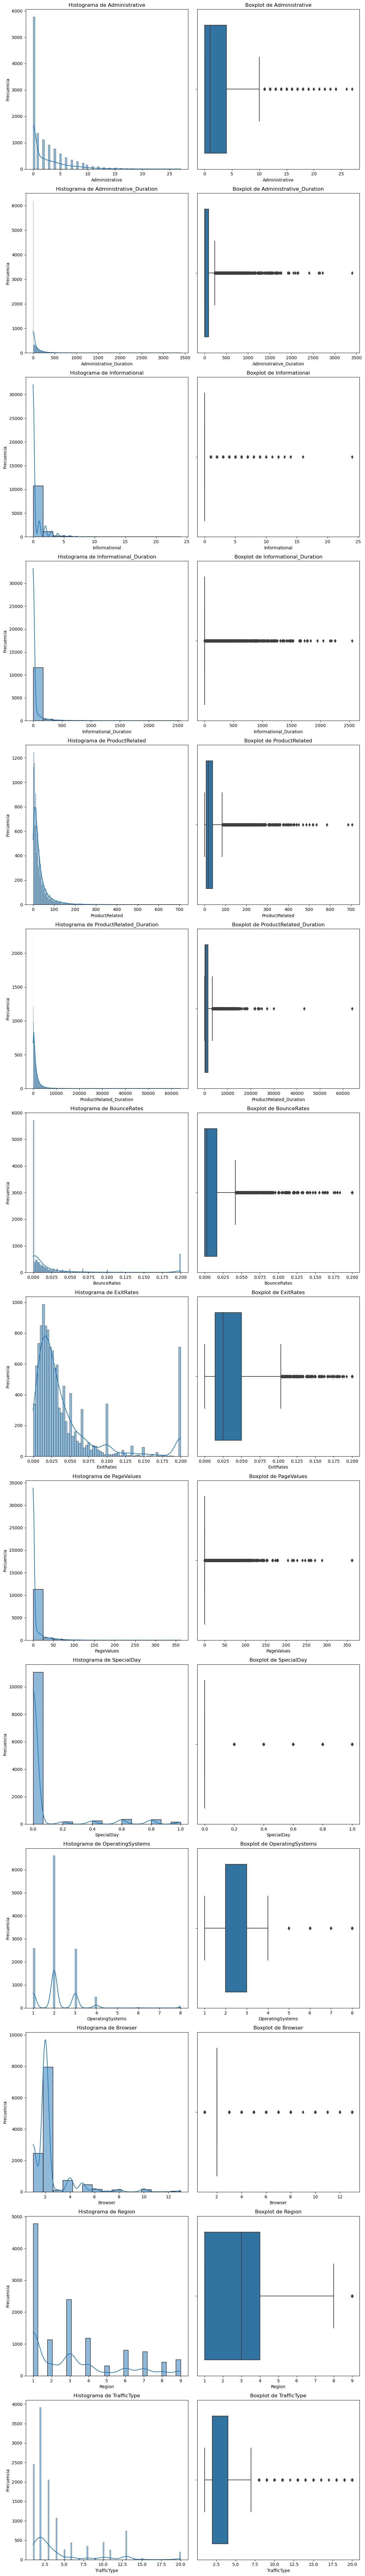

In [6]:
numeric_vars=df.select_dtypes(include=['int64','float64']).columns

fig,axes=plt.subplots(len(numeric_vars),2,
                      figsize=(12,6*len(numeric_vars)))

for i,var in enumerate(numeric_vars):
    # Histograma
    sns.histplot(df[var],kde=True,ax=axes[i,0])
    axes[i,0].set_title(f'Histograma de {var}')
    axes[i,0].set_xlabel(var)
    axes[i,0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(data=df,x=var,ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot de {var}')
    axes[i,1].set_xlabel(var)

plt.tight_layout()
plt.show()

Represento ahora las variables categóricas mediante diagramas de barras

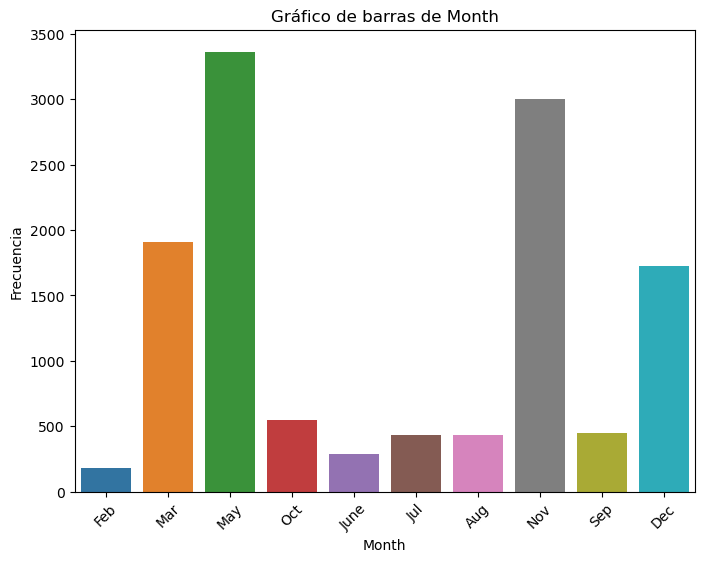

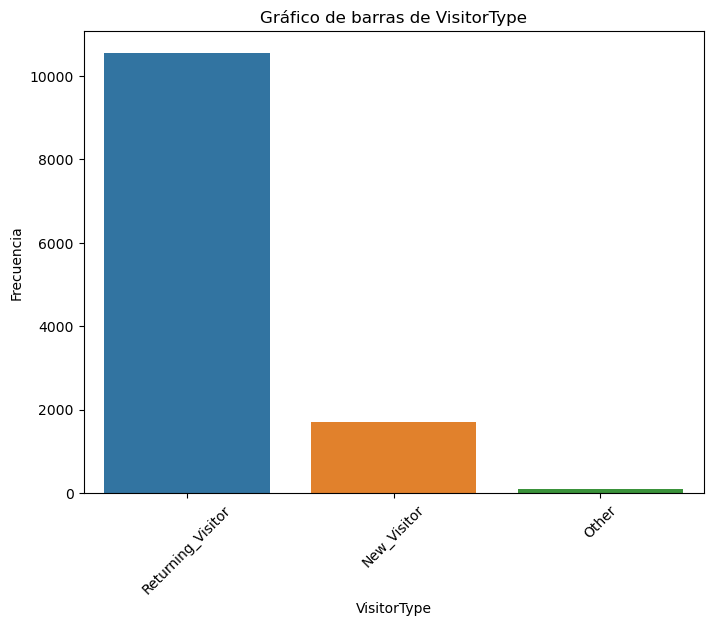

In [7]:
categorical_vars=df.select_dtypes(include=['object']).columns
for var in categorical_vars:
    plt.figure(figsize=(8,6))
    sns.countplot(df[var])
    plt.title(f'Gráfico de barras de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

Matriz de correlación de las variables numéricas

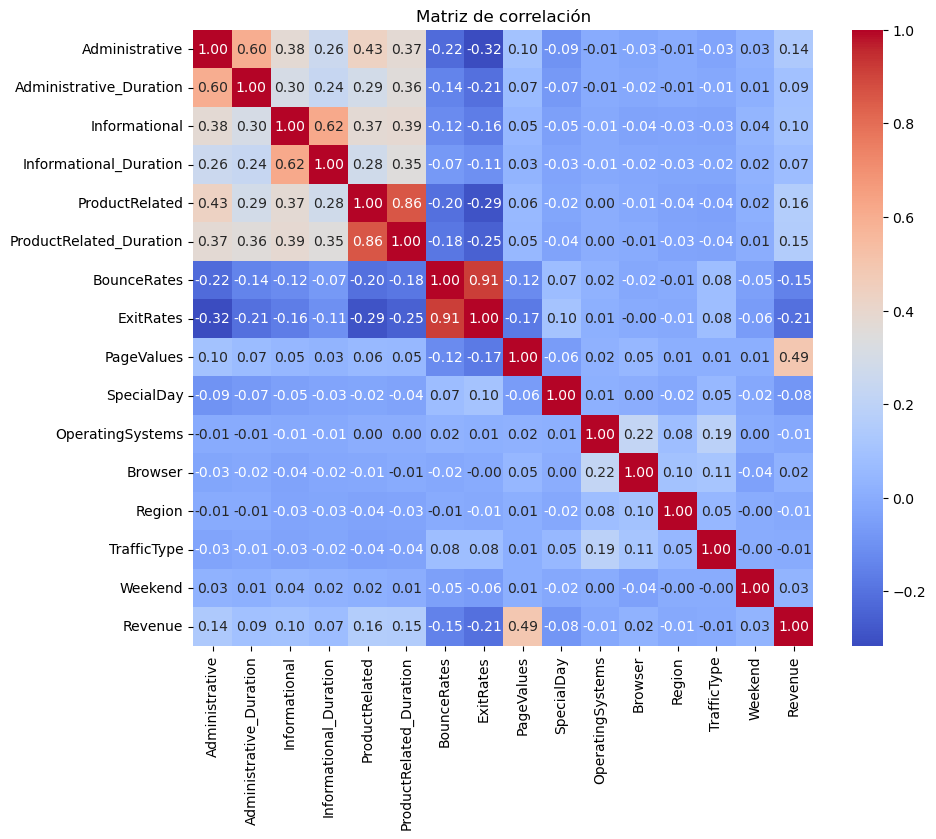

In [8]:
plt.figure(figsize=(10,8))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Representamos nuestra variables objetivo, intencion de compra en linea, Revenue

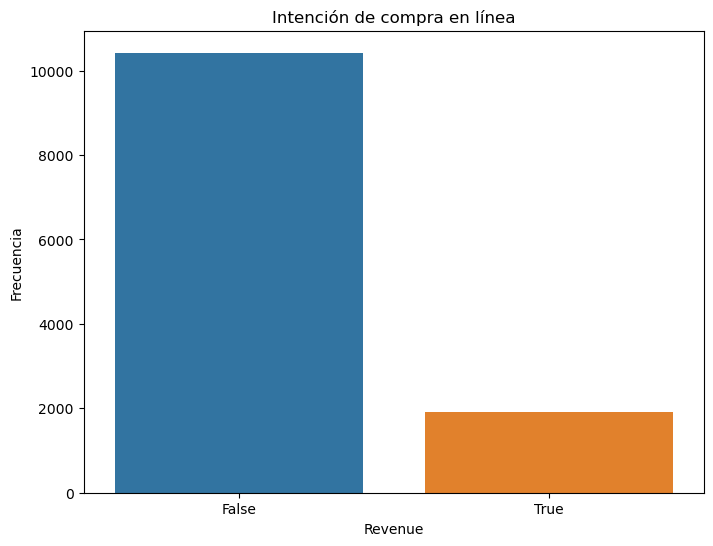

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(df['Revenue'])
plt.title('Intención de compra en línea')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')
plt.show()

De las anteriores gráficas saco las siguientes conclusiones:
    
    Es lógico que el objetivo de este estudio sea lanzar campañas especiales para los clientes que suelen comprar online, ya que son muchos menos que los que lo hacen. Por lo que estas campañas pueden animar a otros clientes a comprar online por los beneficios de las campañas.
    
    A partir de la matriz de correlación puedo hacerme una idea de cuáles son las varibles más influyentes para mi variables objetivo Revenue, como pueden ser: PageValues(0,49), ExitRates(-0,21),ProductRelated(0,16)...
        
    De las gráficas de las var. cualitativas observamos que la mayoría de los clientes son clientes que ya han comprado alguna vez en esa misma tienda, por lo que son fieles, y los meses en lo que más cantidad de compras que son marzo, mayo, noviembre y diciembre pueden coincidir con fechas como día del padre, de la madre, black friday y navidades, aunque es cierto que la variable SpecialDay no guarda una relación muy elevada con nuestra variable objetivo (-0,08), por lo que me hace pensar que sí se realizan compras en esos meses, pero que la gente no espera a última hora para comprar...puede estar asociado con el tiempo de ennvio.
    
    La variable PageValues frente a tener un boxplot con todo valores atípicos, es la variable con más correlación con la variables objetivo. Ésto puede deberse a que se trata de una variable con gran variabilidad y no podemos considerar esos puntos como outliers.

2.-Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado Dropna().a.

In [10]:
#Identifico los valores faltantes
missing_values=df.isnull().sum()
missing_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Aunque en un apartado posterior se pide que elimine las variables que considero que no son necesarias, realizo ahora esa eliminación ya que considero que me puede ayudar tener menos variables para poder tratar correctamente los outliers. Sigo el criterio de eliminar las variables que tienen un coeficiente de correlación inferior al 0.1

In [11]:
low_correlation_vars=corr_matrix[corr_matrix['Revenue'].abs()<0.1].index

df=df.drop(columns=low_correlation_vars)

print("Variables eliminadas:",low_correlation_vars)

Variables eliminadas: Index(['Administrative_Duration', 'Informational', 'Informational_Duration',
       'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend'],
      dtype='object')


In [12]:
df.shape

(12330, 9)

In [14]:
#Función para eliminar outliers de una columna específica
def eliminar_outliers_columna(df,columna):
    Q1=df[columna].quantile(0.25)
    Q3=df[columna].quantile(0.75)
    IQR=Q3-Q1
    limite_inferior=Q1-1.5*IQR
    limite_superior=Q3+1.5*IQR
    return df[(df[columna]>=limite_inferior)&(df[columna]<=limite_superior)]

#Lista de columnas a procesar
columnas_a_procesar=['Administrative','ProductRelated',
                     'ProductRelated_Duration','BounceRates',
                     'ExitRates']

#Iterar sobre las columnas y eliminar outliers
for columna in columnas_a_procesar:
    df=eliminar_outliers_columna(df,columna)


Vuelvo a representar mis variables numéricas, pero ya solo con las que voy a trabajar.


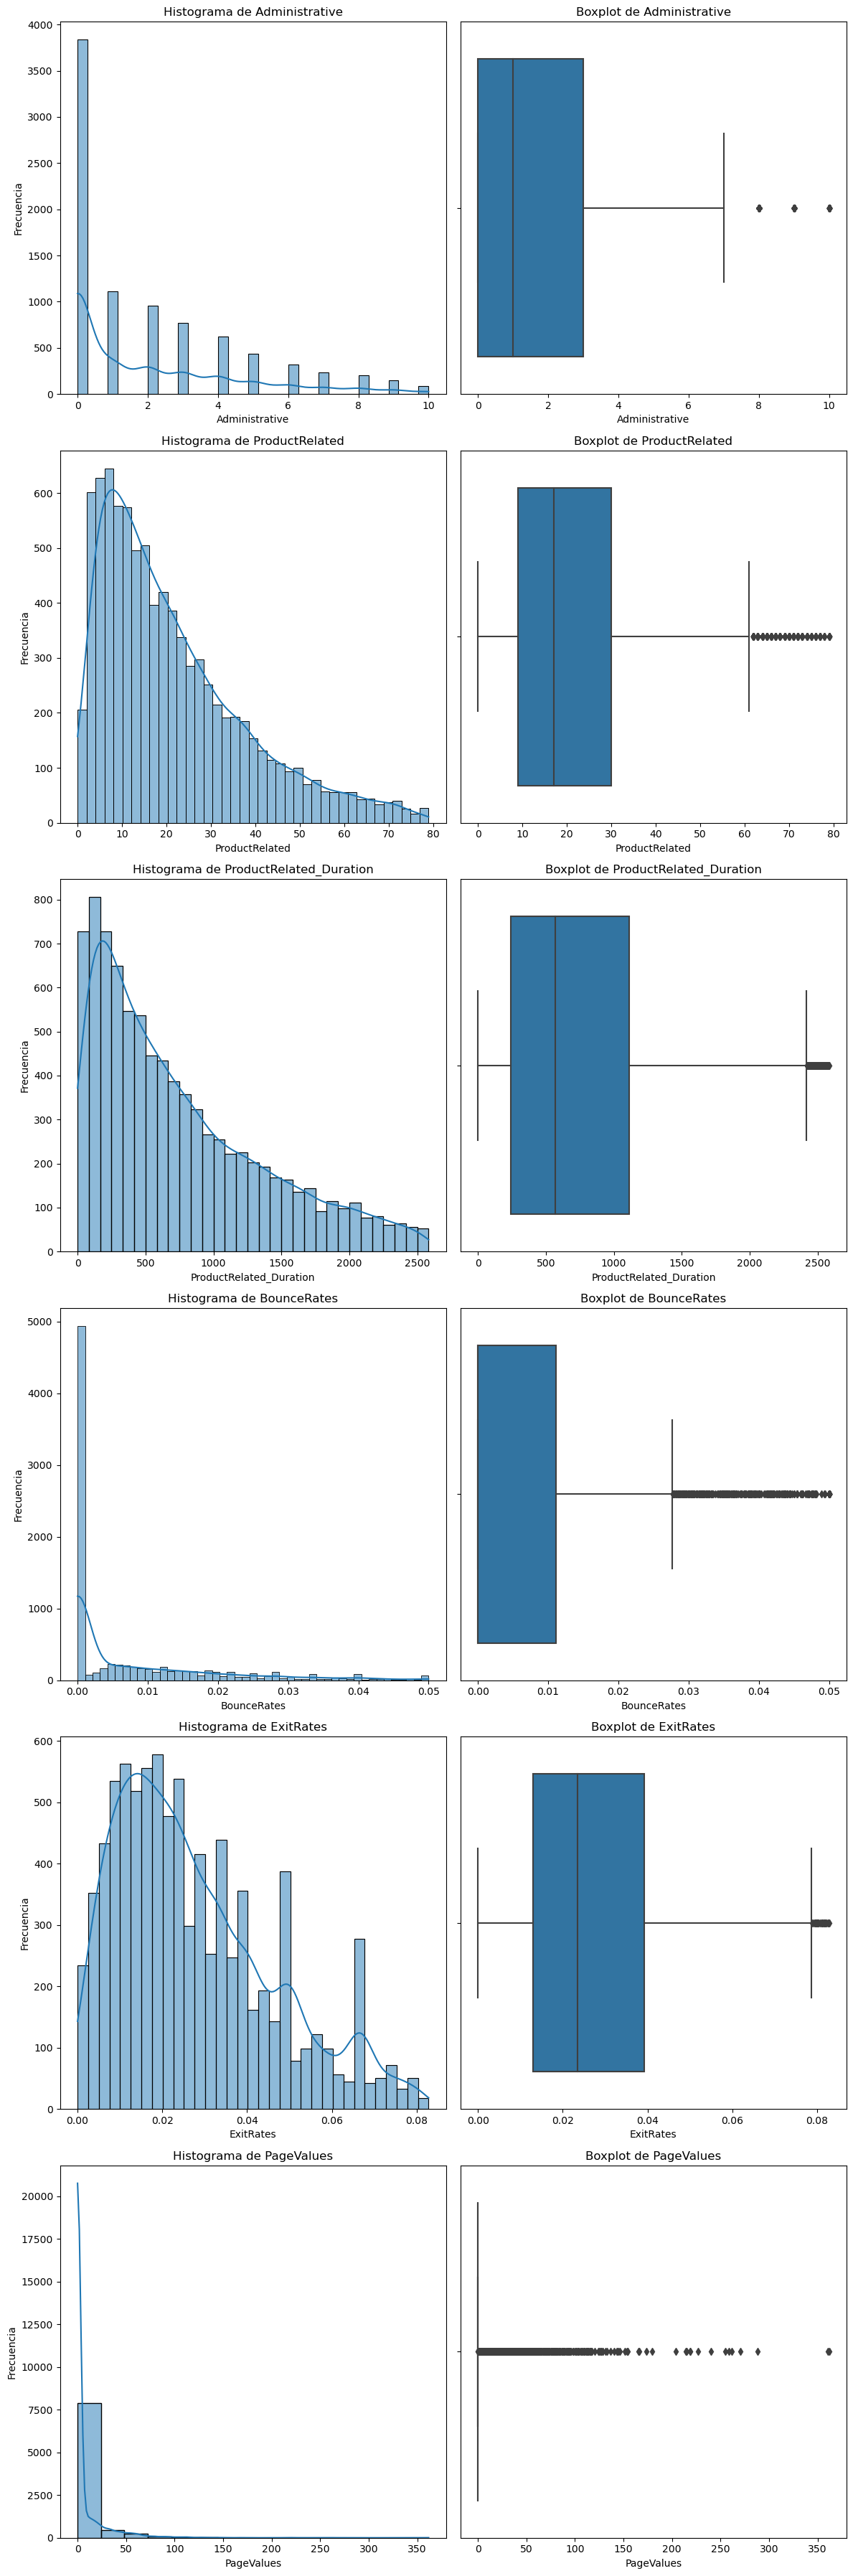

In [15]:
numeric_vars=df.select_dtypes(include=['int64','float64']).columns

fig,axes=plt.subplots(len(numeric_vars),2,
                      figsize=(12,6*len(numeric_vars)))

for i,var in enumerate(numeric_vars):
    # Histograma
    sns.histplot(df[var],kde=True,ax=axes[i,0])
    axes[i,0].set_title(f'Histograma de {var}')
    axes[i,0].set_xlabel(var)
    axes[i,0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(data=df,x=var,ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot de {var}')
    axes[i,1].set_xlabel(var)

plt.tight_layout()
plt.show()

**OPCION C: ELIMINO VARIABLES Y ELIMINO OUTLIERS**

3.-Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan.

Decido utilizar la técnica de OHE ya que las variables categóricas con las que trabajo son Visitor Type y Month. En el caso de VisitorType no existe un orden intrínseco en la variable, y en el caso de Month todos son igual de importantes.


In [16]:
categorical_columns=df.select_dtypes(include=['object']).columns

# Aplicar codificación one-hot a las columnas categóricas
df=pd.get_dummies(df,columns=categorical_columns)


In [17]:
df.head()

,Administrative,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
4,0,10,627.500000,0.020000,0.050000,0.0,False,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,19,154.216667,0.015789,0.024561,0.0,False,0,0,1,0,0,0,0,0,0,0,0,0,1
9,0,3,738.000000,0.000000,0.022222,0.0,False,0,0,1,0,0,0,0,0,0,0,0,0,1
10,0,3,395.000000,0.000000,0.066667,0.0,False,0,0,1,0,0,0,0,0,0,0,0,0,1
11,0,16,407.750000,0.018750,0.025833,0.0,False,0,0,1,0,0,0,0,0,0,0,0,0,1


df.shape

4.-Estandariza los datos.

Con la estandarización consigo que todas mis variables tengan una media 0 y una desviacion estandar de 1

In [18]:
scaler=StandardScaler()

# Estandarizar las columnas numéricas
numeric_columns=df.select_dtypes(include=['int64','float64']).columns
df[numeric_columns]=scaler.fit_transform(df[numeric_columns])


In [19]:
df.head()

,Administrative,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
4,-0.796043,-0.706154,-0.189814,1.139869,1.211453,-0.330214,False,0,0,1,0,0,0,0,0,0,0,0,0,1
5,-0.796043,-0.158471,-0.949617,0.765989,-0.157686,-0.330214,False,0,0,1,0,0,0,0,0,0,0,0,0,1
9,-0.796043,-1.132131,-0.012419,-0.636062,-0.283584,-0.330214,False,0,0,1,0,0,0,0,0,0,0,0,0,1
10,-0.796043,-1.132131,-0.563067,-0.636062,2.108475,-0.330214,False,0,0,1,0,0,0,0,0,0,0,0,0,1
11,-0.796043,-0.341032,-0.542598,1.028874,-0.089229,-0.330214,False,0,0,1,0,0,0,0,0,0,0,0,0,1


Es importante realizar la estandarización de las variables ya que para poder trabajar con algoritmos de ML necesito que los datos tengan una escala comparable para poder entrenar el modelo correctamente.

5.-Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch.

Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc.

Utilizar un modelo de redes neuronales.

Utilizar cualquier otro modelo de clasificación.

In [20]:
#Comienzo dividiendo los datos en train y test
X=df.drop('Revenue',axis=1) 
y=df['Revenue']

X_train,X_test,y_train,y_test=train_test_split(X,y, 
                            test_size=0.2,random_state=42)


In [21]:
#Ajusto un modelo lineal (Regresión Logística)
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

#Ajusto un modelo de redes neuronales (MLPClassifier)
neural_network_model=MLPClassifier(hidden_layer_sizes=(100,), 
                                   max_iter=1000)
neural_network_model.fit(X_train,y_train)

#Ajusto cualquier otro modelo de clasificación (Random Forest)
random_forest_model=RandomForestClassifier()
random_forest_model.fit(X_train,y_train)


RandomForestClassifier()

6.-Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la forma que se estime oportuna, siempre justificándolo.

In [22]:
#Para la regresión logística

#Definir los hiperparámetros a explorar 
param_grid_logistic={'C':[0.1, 1, 10]}

#Crear el objeto GridSearchCV
grid_search_logistic=GridSearchCV(LogisticRegression(), 
                                  param_grid_logistic,cv=5)

#Ajustar el modelo con GridSearchCV
grid_search_logistic.fit(X_train,y_train)

#Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros para Regresión Logística:",
      grid_search_logistic.best_params_)
print("Mejor score para Regresión Logística:", 
      grid_search_logistic.best_score_)

Mejores parámetros para Regresión Logística: {'C': 10}
Mejor score para Regresión Logística: 0.8906876790830947


In [23]:
#Para redes neuronales

#Definir los hiperparámetros a explorar
param_grid_neural_network={'hidden_layer_sizes':[(50,),(100,),
                    (200,)],'alpha':[0.0001,0.001,0.01]}

#Crear el objeto GridSearchCV 
grid_search_neural_network=GridSearchCV(MLPClassifier(max_iter=1000), 
                                    param_grid_neural_network,cv=5)

#Ajustar el modelo con GridSearchCV
grid_search_neural_network.fit(X_train,y_train)

#Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros para Redes Neuronales:", 
      grid_search_neural_network.best_params_)
print("Mejor score para Redes Neuronales:", 
      grid_search_neural_network.best_score_)

Mejores parámetros para Redes Neuronales: {'alpha': 0.01, 'hidden_layer_sizes': (50,)}
Mejor score para Redes Neuronales: 0.9050143266475645


In [24]:
#Para Random Forest

#Definir los hiperparámetros
param_grid_random_forest={'n_estimators':[50,100,200],
                          'max_depth':[None,10,20]}

#Crear el objeto GridSearchCV 
grid_search_random_forest=GridSearchCV(RandomForestClassifier(), 
                                param_grid_random_forest,cv=5)

#Ajustar el modelo con GridSearchCV
grid_search_random_forest.fit(X_train,y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros para Random Forest:", 
      grid_search_random_forest.best_params_)
print("Mejor score para Random Forest:", 
      grid_search_random_forest.best_score_)

Mejores parámetros para Random Forest: {'max_depth': 10, 'n_estimators': 200}
Mejor score para Random Forest: 0.9117478510028654


7.-Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y obtener una métrica estimada.

In [49]:
#Definir los modelos con los mejores parámetros 
#encontrados mediante GridSearchCV
best_logistic_model=grid_search_logistic.best_estimator_
best_neural_network_model=grid_search_neural_network.best_estimator_
best_random_forest_model=grid_search_random_forest.best_estimator_


In [50]:
#Evaluar los modelos utilizando CrossValidation y la métrica ROC
roc_scores_logistic=cross_val_score(best_logistic_model,X_train,
                            y_train,cv=5,scoring='roc_auc')
roc_scores_neural_network=cross_val_score(best_neural_network_model,
                    X_train,y_train,cv=5,scoring='roc_auc')
roc_scores_random_forest=cross_val_score(best_random_forest_model,
                    X_train,y_train,cv=5,scoring='roc_auc')


In [51]:
#Calcular el promedio de la métrica ROC en CrossValidation 
#para cada modelo
mean_roc_logistic=roc_scores_logistic.mean()
mean_roc_neural_network=roc_scores_neural_network.mean()
mean_roc_random_forest=roc_scores_random_forest.mean()

In [60]:
#Elegir el mejor modelo según la métrica ROC en CrossValidation

best_model=None
best_roc_score=None
if mean_roc_logistic>mean_roc_neural_network and mean_roc_logistic>mean_roc_random_forest:
    best_model=best_logistic_model
    best_roc_score=mean_roc_logistic
elif mean_roc_neural_network>mean_roc_logistic and mean_roc_neural_network>mean_roc_random_forest:
    best_model=best_neural_network_model
    best_roc_score=mean_roc_neural_network
else:
    best_model=best_random_forest_model
    best_roc_score=mean_roc_random_forest

#Predecir en el conjunto de prueba y calcular la métrica ROC
test_roc_score=roc_auc_score(y_test,
                    best_model.predict_proba(X_test)[:,1])


In [53]:
#Mostrar el mejor modelo y su métrica ROC estimada 
#en el conjunto de prueba

print("El mejor modelo según la métrica ROC en CrossValidation es:",best_model.__class__.__name__)
print("Métrica ROC estimada en el conjunto de prueba:",test_roc_score)

El mejor modelo según la métrica ROC en CrossValidation es: RandomForestClassifier
Métrica ROC estimada en el conjunto de prueba: 0.9287832773900225


8.-Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.

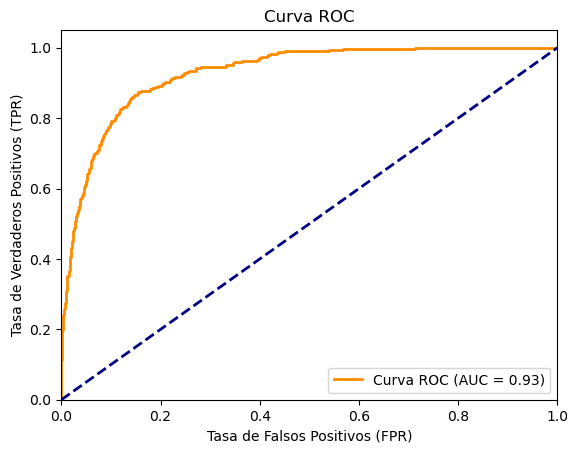

Umbral óptimo: 0.15303287120732115
Área bajo la curva ROC: 0.9287832773900225


In [58]:
#Obtener las probabilidades predichas por el modelo 
#en el conjunto de prueba
y_pred_proba=best_model.predict_proba(X_test)[:,1]

#Calcular la curva ROC y el área bajo la curva ROC
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)

#Trazar la curva ROC
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,
         label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#Encontrar el umbral que maximiza el AUC
best_threshold_index=np.argmax(tpr-fpr)
best_threshold=thresholds[best_threshold_index]

#Umbralizar las probabilidades utilizando el umbral que 
#maximiza el AUC
y_pred_threshold=(y_pred_proba>=best_threshold).astype(int)

#Mostrar el umbral óptimo y el AUC
print("Umbral óptimo:",best_threshold)
print("Área bajo la curva ROC:",roc_auc)

El resultado "Umbral óptimo" es el umbral que maximiza la métrica AUC (Área bajo la curva ROC). Este umbral se utiliza para clasificar las probabilidades en positivo o negativo. En este caso, el valor específico de 0.153 indica el umbral que maximiza la diferencia entre la tasa de verdaderos positivos y la tasa de falsos positivos en la curva ROC.

El resultado "Área bajo la curva ROC" (AUC) es una métrica de evaluación del modelo que indica la capacidad del modelo para distinguir entre clases positivas y negativas. Un valor de AUC cercano a 1 indica un modelo excelente, mientras que un valor de AUC cercano a 0.5 indica un modelo que clasifica al azar. En este caso, el valor de 0.9287 indica que el modelo tiene una muy buena capacidad para distinguir entre las clases positivas y negativas.